# 신입교육세션 과제1 : 서울 종합병원 분포 확인하기

### 필요한 라이브러리 불러오기
##### seaborn: 데이터 시각화를 위한 라이브러리 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

## 1.2 시각화를 위한 폰트 설정

#### matplotlib: 데이터 시각화 라이브러리

#### %matplotlib inline: 그래프가 노트북 안에 보이게 하기 위해

#### 폰트가 선명하게 보이도록 설정

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\강태희\AppData\Local\Temp\ipykernel_10716\1557408062.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


### 1.3 데이터 로드하기
##### *read_csv "파일명"으로 데이터 불러오기
##### low_memory=False : 
##### *shape: (행,열) 순으로 데이터의 크기 출력

In [3]:
df=pd.read_csv("C:/users/강태희/Documents/data/소상공인시장진흥공단_상가업소정보_의료기관_201909/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)
df.shape

(91335, 39)

#### 데이터 미리보기


In [4]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [11]:
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91330,16196725,온누리약국,베스트,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,3017011200115070000021096,NaN,대전광역시 서구 문예로 67,302831.0,35240.0,NaN,NaN,NaN,127.389865,36.352728
91331,16192180,리원,봄산후조,S,의료,S07,의료관련서비스업,S07A07,산후조리원,S96993,...,4128112300111460000011715,청한프라자,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,NaN,NaN,NaN,126.830144,37.627530
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2641010800105380001005572,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1174010500103450009002392,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.806640


In [12]:
df.sample()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
68548,25218889,신동한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,2720010300115830008000001,관문빌딩,대구광역시 남구 대명서로 165,705030.0,42498.0,11,NaN,NaN,128.55644,35.834631


#### 데이터 요약하기
###### 요약정보: df.info() 
###### columns name: df.columns
###### 데이터타입 확인: df.dtypes

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [15]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [16]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

#### 결측치 확인하기

###### df.isnull() : 데이터 안에 들어있는 값이 null인지 확인할 수 있음. 

In [17]:
df.isnull()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
3,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False
91331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
91332,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
91333,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False


In [19]:
df.isnull().sum()

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

##### 위에서 구한 결측치를 변수에 담고 변수.plot.bar 를 통해 막대그래프로 표현해보기
###### 차이를 보고 싶을 때 그래프를 통해 시각화하기

In [5]:
null_count = df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<Axes: >

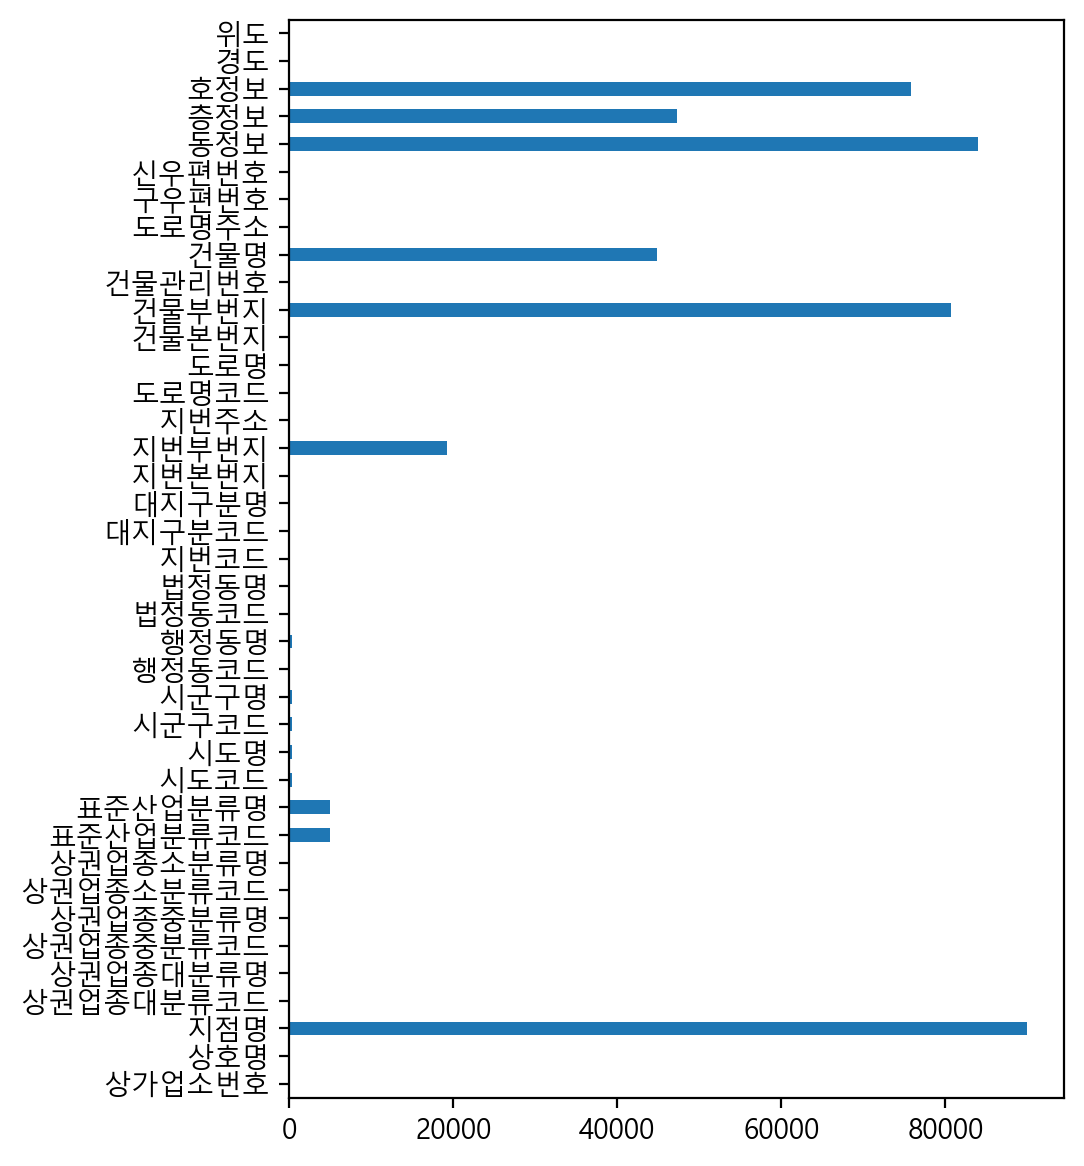

In [24]:
null_count.plot.barh(figsize=(5,7))

#### plot.()에서 적합한 그래프 사용할 것
##### rot= : 글자를 돌려줌
##### barh: bar 차트를 돌려서 나타냄
##### figsize: 그래프 사이즈 조정 

##### 위에서 계산한 결측치 수를 reset_index 를 통해 데이터프레임으로 만들어주기
##### df_null_count 변수에 결과를 담아 head로 미리보기 가능

In [25]:
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 컬럼명 변경하기
### 기본 컬럼명은 index, 0 이기에 "컬럼명" ,"결측치수"로 수정할 것

In [27]:
df_null_count.columns=["컬럼명","결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 정렬하기
#### sort_values : 값을 기준으로 레이블을 정렬하는 메서드
#### df_null_count 에 있는 결측치수 칼럼을 sort_values를 통해 정렬한다
#### ascending=False : 결측치가 많은 순으로 출력하고 싶다면 

In [28]:
df_null_count.sort_values(by="결측치수")

,컬럼명,결측치수
0,상가업소번호,0
31,도로명주소,0
29,건물관리번호,0
27,건물본번지,0
26,도로명,0
25,도로명코드,0
24,지번주소,0
22,지번본번지,0
21,대지구분명,0
20,대지구분코드,0


In [30]:
df_null_count.sort_values(by="결측치수", ascending=False)

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [31]:
df_null_count.sort_values(by="결측치수",ascending=False).head(10)

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


##### 결측치 수가 많은 순으로 상위 10개만 출력

### 특정 칼럼만 불러오기

In [32]:
df_null_count["컬럼명"]

0        상가업소번호
1           상호명
2           지점명
3     상권업종대분류코드
4      상권업종대분류명
5     상권업종중분류코드
6      상권업종중분류명
7     상권업종소분류코드
8      상권업종소분류명
9      표준산업분류코드
10      표준산업분류명
11         시도코드
12          시도명
13        시군구코드
14         시군구명
15        행정동코드
16         행정동명
17        법정동코드
18         법정동명
19         지번코드
20       대지구분코드
21        대지구분명
22        지번본번지
23        지번부번지
24         지번주소
25        도로명코드
26          도로명
27        건물본번지
28        건물부번지
29       건물관리번호
30          건물명
31        도로명주소
32        구우편번호
33        신우편번호
34          동정보
35          층정보
36          호정보
37           경도
38           위도
Name: 컬럼명, dtype: object

### 기초통계량 값 계산

In [6]:
df['위도'].mean()

36.62471119236685

In [7]:
df['위도'].median()

37.2346523177033

In [8]:
df['위도'].max()

38.4996585705598

In [9]:
df['위도'].min()

33.2192896688307

In [10]:
df['위도'].count()

91335

### 기초통계값 요약하기

#### descibe: 통계적인 수치를 보여주는 것
#### describe을 사용하면 데이터를 요약할 수 있다. 기본적으로 수치형 데이터를 요약해서 보여준다
#### ex: 데이터의 갯수, 평균, 표준편차, 최소값, 최댓값, 사분위수 등

In [11]:
df['위도'].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

### 컬럼 2개를 가져올 때 리스트 형태로 가져와야한다. ex : df[['칼럼1','칼럼2']]

In [14]:
df[['위도','경도']].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


#### describe(include='number') :수치형 데이터만 가져와 요약을 본다
#### describe(include='object') : 뮨자형 데이터타입의 요약을 본다

In [15]:
df.describe(include='object')

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,동정보,층정보,호정보
count,91335,1346,91335,91335,91335,91335,91335,91335,86413,86413,...,91280,91335,91335,91335,91335,46453,91335,7406,44044,15551
unique,56910,858,1,1,5,5,34,34,15,15,...,2822,2,53118,16610,54142,17946,54031,556,74,849
top,리원,장례식장,S,의료,S01,병원,S02A01,약국,Q86201,일반 의원,...,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,현대아파트,서울특별시 동대문구 약령중앙로8길 10,1,1,1
freq,152,97,91335,91335,60774,60774,18964,18964,22555,22555,...,874,91213,198,326,198,131,198,1571,15994,1286


#### '리원'이라는 상호명이 가장 많이 나오는걸 확인할 수 있음. 
#### 도로명주소는 강남대로가 가장 많은걸 확인할 수 있음.
#### 결측치는 제외하고 보여줌.

In [16]:
df.describe(include='number')

,상가업소번호,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,지번부번지,도로명코드,건물본번지,건물부번지,구우편번호,신우편번호,경도,위도
count,9.133500e+04,90956.000000,90956.000000,9.133500e+04,9.128000e+04,9.133500e+04,91335.000000,91335.000000,72079.000000,9.133500e+04,91335.000000,10604.000000,91323.000000,91333.00000,91335.000000,91335.000000
mean,2.121818e+07,32.586712,32898.381877,3.293232e+09,3.293385e+09,3.293191e+18,1.001336,587.534549,17.005092,3.293207e+11,251.200482,7.241135,428432.911085,28085.47698,127.487524,36.624711
std,5.042828e+06,13.045138,12985.393171,1.297387e+09,1.297706e+09,1.297393e+18,0.036524,582.519364,53.451413,1.297391e+11,477.456487,12.426816,193292.339066,18909.01455,0.842877,1.041361
min,2.901108e+06,11.000000,11110.000000,1.111052e+09,1.111010e+09,1.111010e+18,1.000000,1.000000,1.000000,1.111020e+11,0.000000,1.000000,100011.000000,1000.00000,124.717632,33.219290
25%,2.001931e+07,26.000000,26350.000000,2.635065e+09,2.635011e+09,2.635011e+18,1.000000,162.000000,2.000000,2.635042e+11,29.000000,1.000000,302120.000000,11681.00000,126.914297,35.811830
50%,2.211900e+07,41.000000,41117.000000,4.111758e+09,4.111710e+09,4.111711e+18,1.000000,462.000000,5.000000,4.111743e+11,92.000000,2.000000,440300.000000,24353.00000,127.084550,37.234652
75%,2.480984e+07,43.000000,43113.000000,4.311370e+09,4.311311e+09,4.311311e+18,1.000000,858.000000,14.000000,4.311332e+11,257.000000,9.000000,602811.000000,46044.00000,128.108919,37.507463
max,2.852470e+07,50.000000,50130.000000,5.013061e+09,5.013032e+09,5.013061e+18,2.000000,7338.000000,1428.000000,5.013049e+11,8795.000000,244.000000,799801.000000,63643.00000,130.909912,38.499659


### 중복제거한 값 보기
#### *unique로 중복을 제거한 값을 보고 nunique로 갯수를 세어본다

In [17]:
df['상권업종대분류명'].unique()

array(['의료'], dtype=object)

##### 상권업종대분류명은 unique값으로 봤을 떄 의료만 포함하는걸 확인할 수 있음 (의료기관만 있기 때문)

In [18]:
df['상권업종대분류명'].nunique()

1

##### 의료라는  데이터는 한번 등장한다는걸 확인할 수 있음

In [19]:
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

##### *nunique 대신 len 사용 가능
##### *len() : Python에서 객체(문자열, 리스트, 튜플 등)의 길이나 크기를 반환하는 함수

In [4]:
len(df['상권업종중분류명'].unique())

5

#### 그룹화된 요약값 보기 -values_counts
##### *value_counts를 사용하면 카테고리 형태의 데이터 갯수를 세워볼 수 있음
##### *value_counts: 지정된 열의 각 값(value)에 대한 모든 발생 횟수를 반환

In [9]:
city=df['시도명'].value_counts()
city

시도명
경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: count, dtype: int64

##### 시도명에 대한 개수 확인 가능

###### *normalize=True 옵션을 사용하면 비율을 구할 수 있음
###### *각각의 데이터가 전체에서 어느정도를 차지하는지 볼 수 있음

In [8]:
city_normalize=df['시도명'].value_counts(normalize=True)
city_normalize

시도명
경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: proportion, dtype: float64

##### *위에서 분석한 시도명 수를 막대그래프로 표현해보기
##### *plot 함수의 기본 형태는 line이므로 데이터에 맞는 차트를 선택할 것

<Axes: ylabel='시도명'>

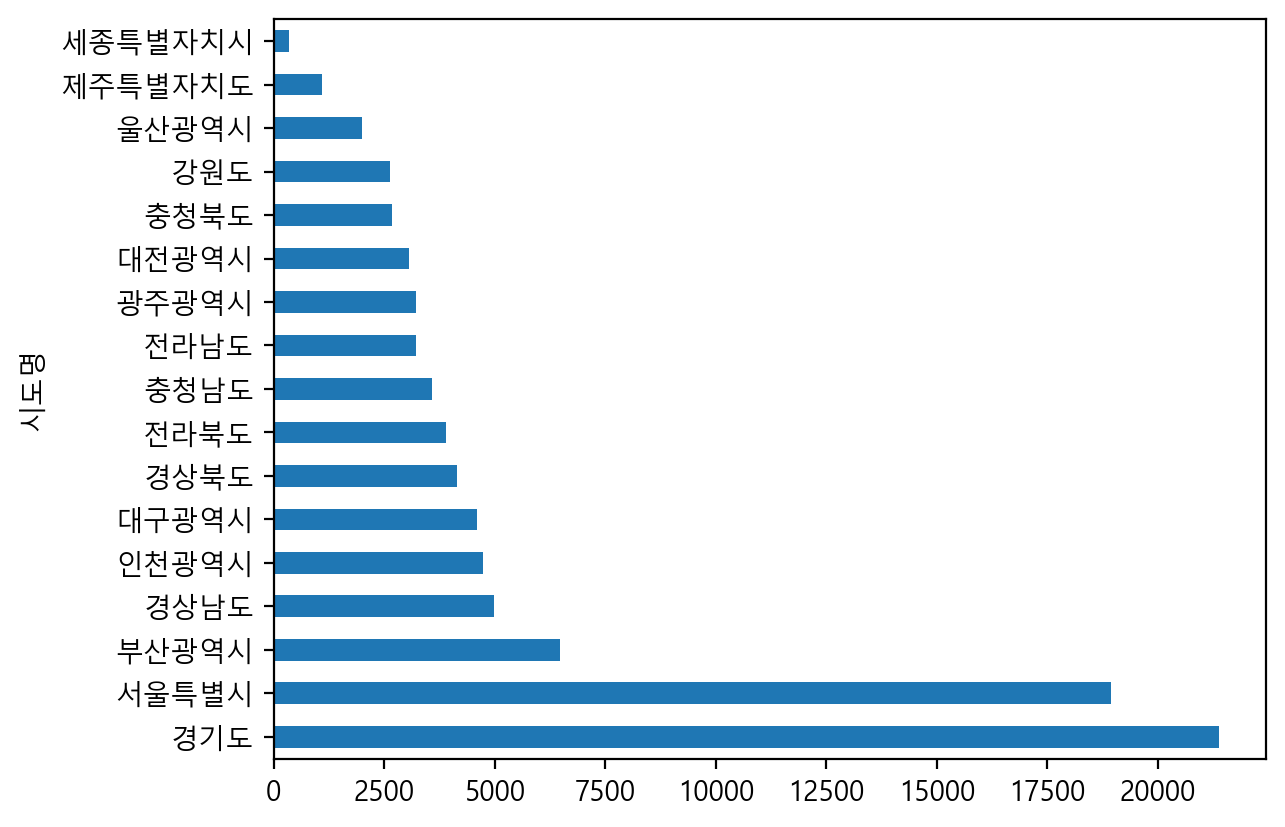

In [10]:
city.plot.barh()

<Axes: ylabel='proportion'>

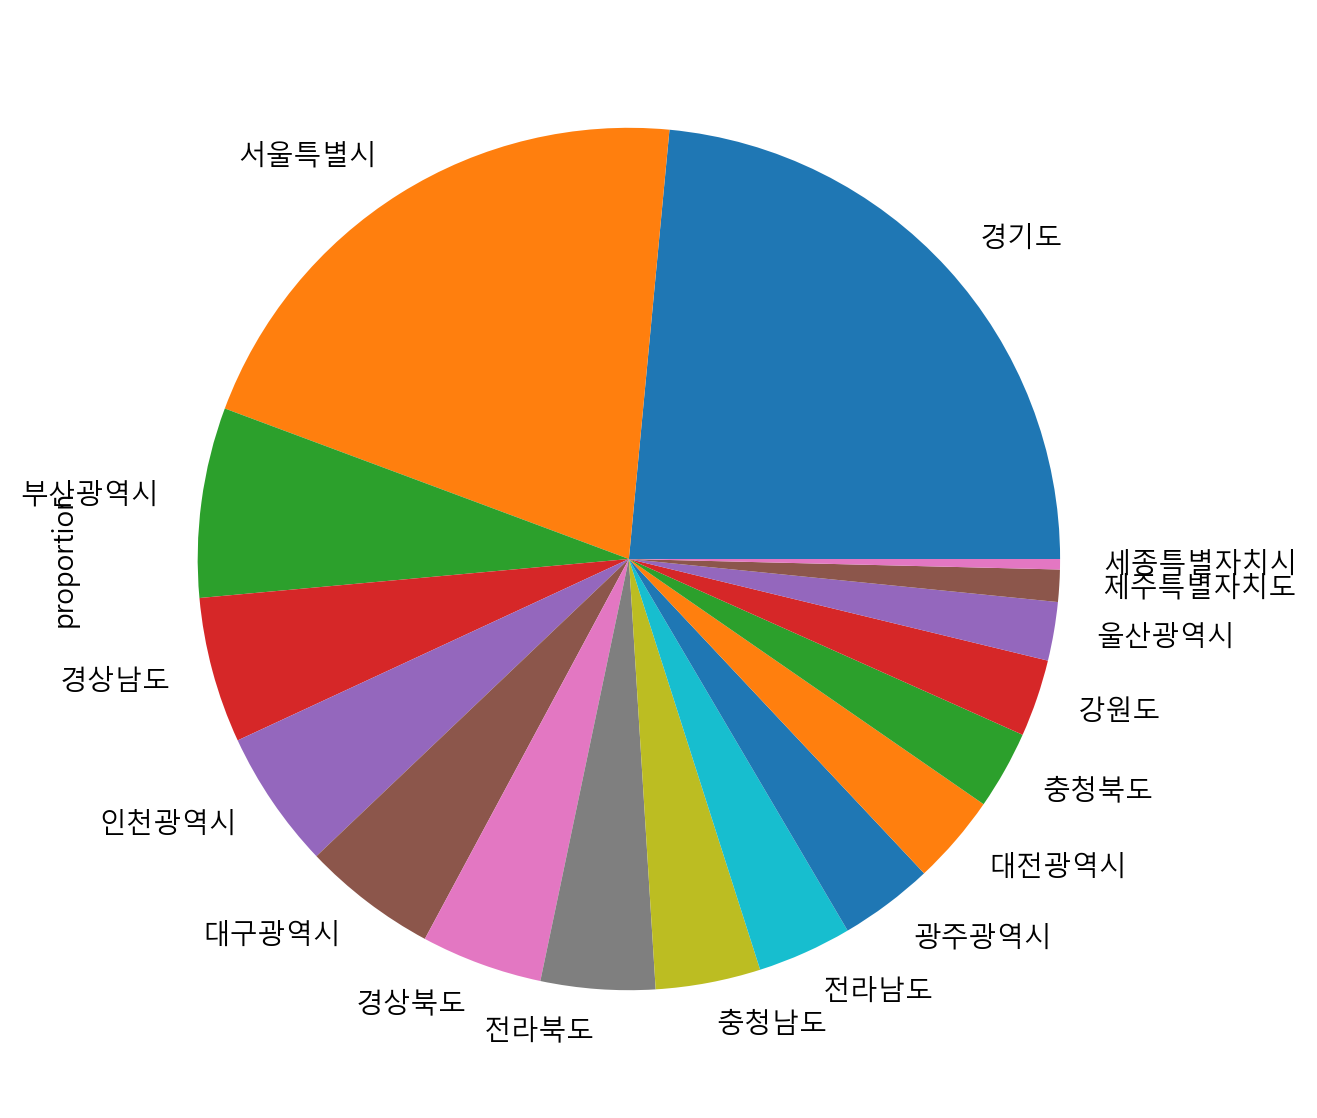

In [13]:
city_normalize.plot.pie(figsize=(7,7))

##### *데이터를 봤을 때 얼만큼 많고 작은지의 차이를 확인하기 어려우므로 여기서 pie 차트는 적절하지 않음
##### *수치를 따로 표시하지 않으면 알아보기 어려움

<Axes: xlabel='시도명', ylabel='count'>

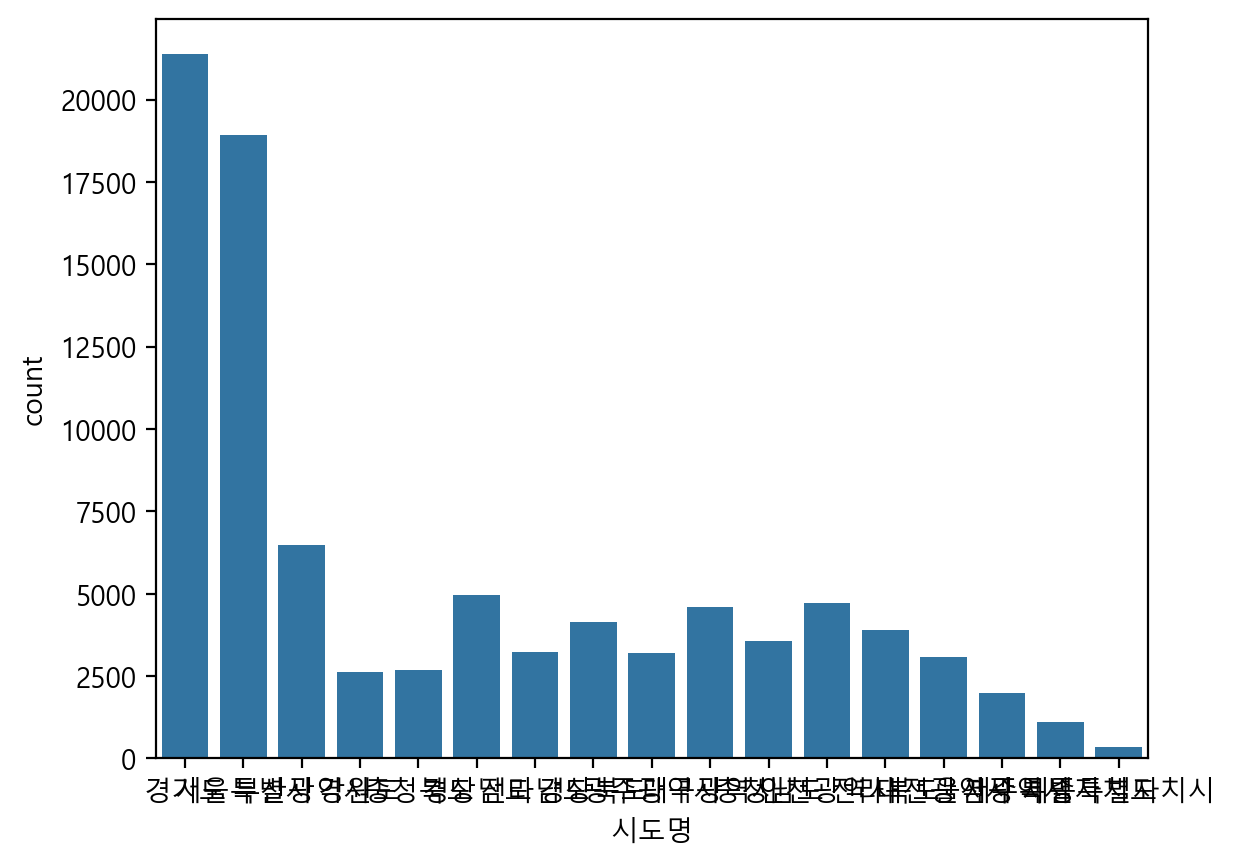

In [14]:
sns.countplot(data=df, x='시도명')

##### seaborn의 countplot으로 그래프 그리기

<Axes: xlabel='count', ylabel='시도명'>

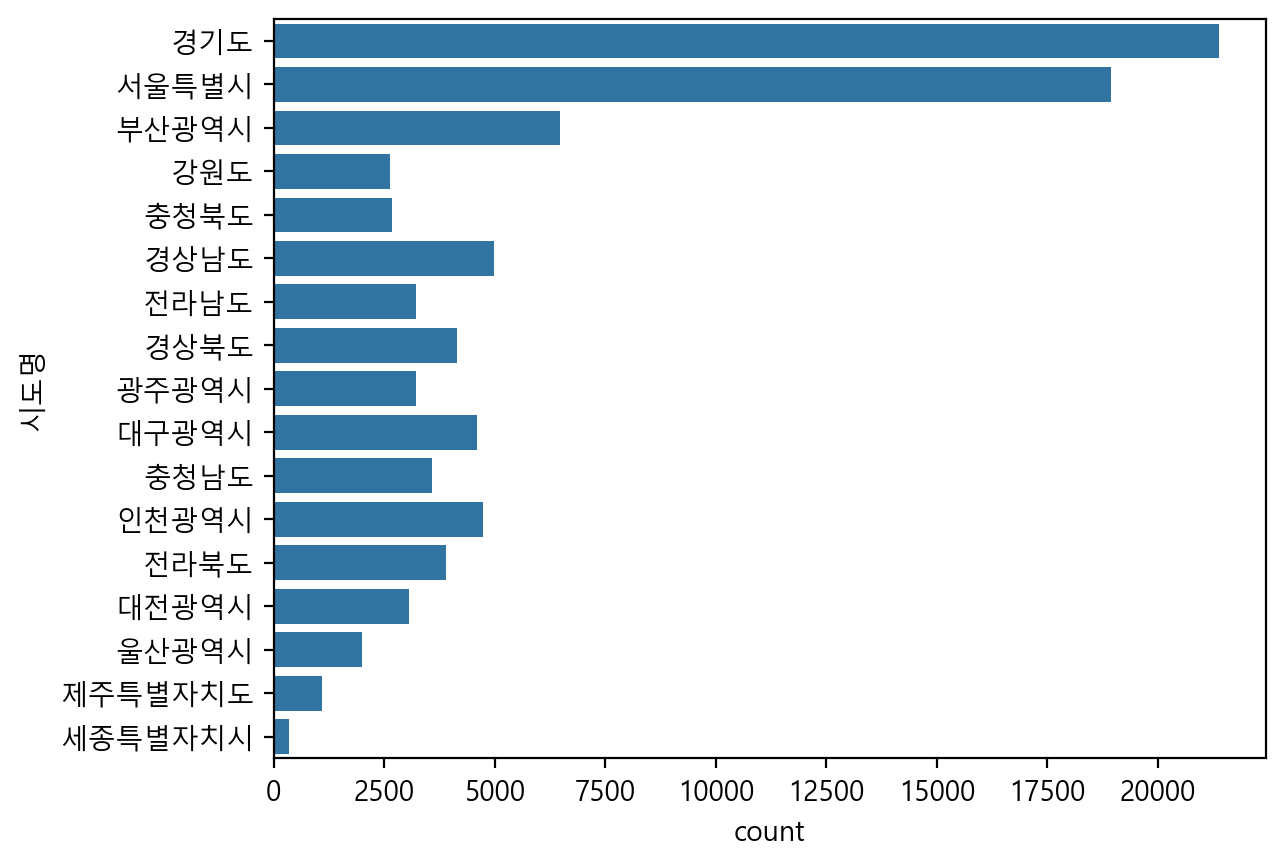

In [15]:
sns.countplot(data=df, y='시도명')

In [20]:
c=df['상권업종중분류명'].value_counts()
c

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

##### '상권업종중분류명'으로 개수를 세어보기

In [21]:
n=df['상권업종중분류명'].value_counts(normalize=True)
n

상권업종중분류명
병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: proportion, dtype: float64

##### normalize=True를 통해 상권업종중분류명으로 비율을 구함

<Axes: xlabel='상권업종중분류명'>

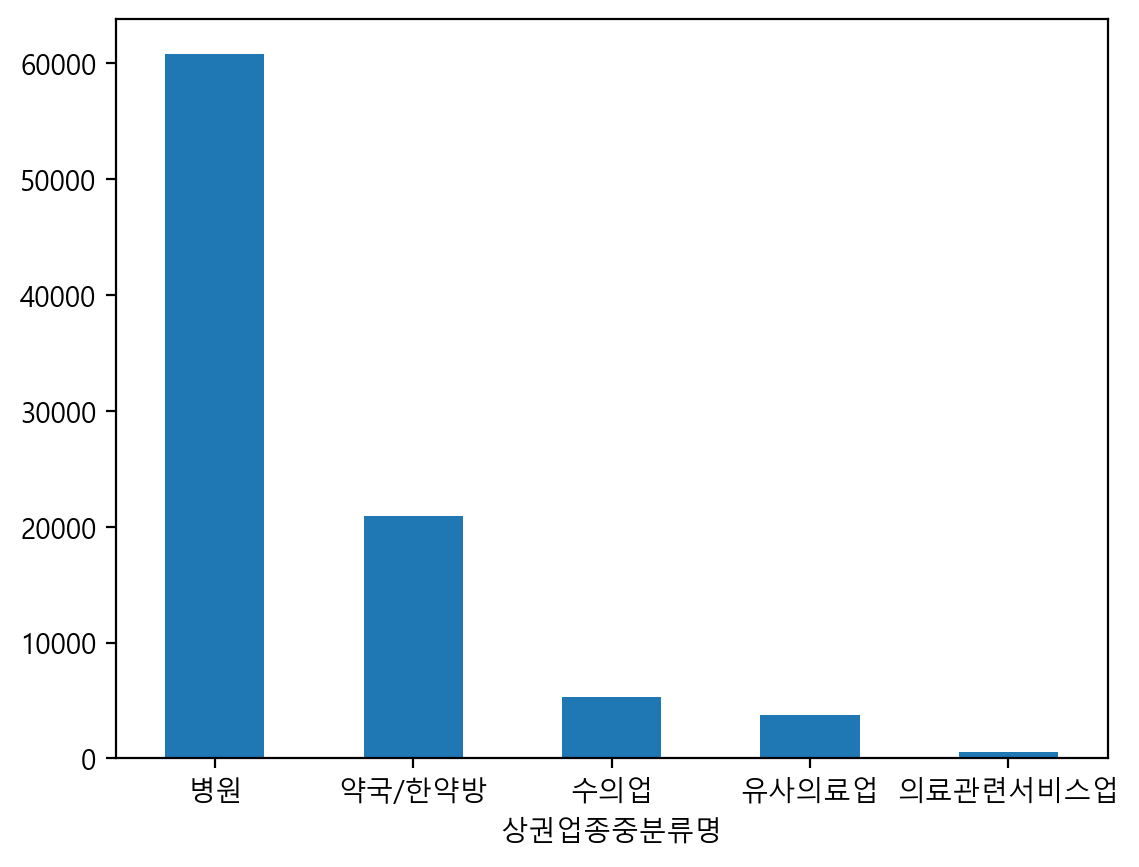

In [23]:
c.plot.bar(rot=0)

#### plot.bar()을 사용해서 막대그래프 그리기
#### 이 때 글자가 돌아가있으므로 rot=0으로 설정하여 글자 회전시킴

<Axes: ylabel='proportion'>

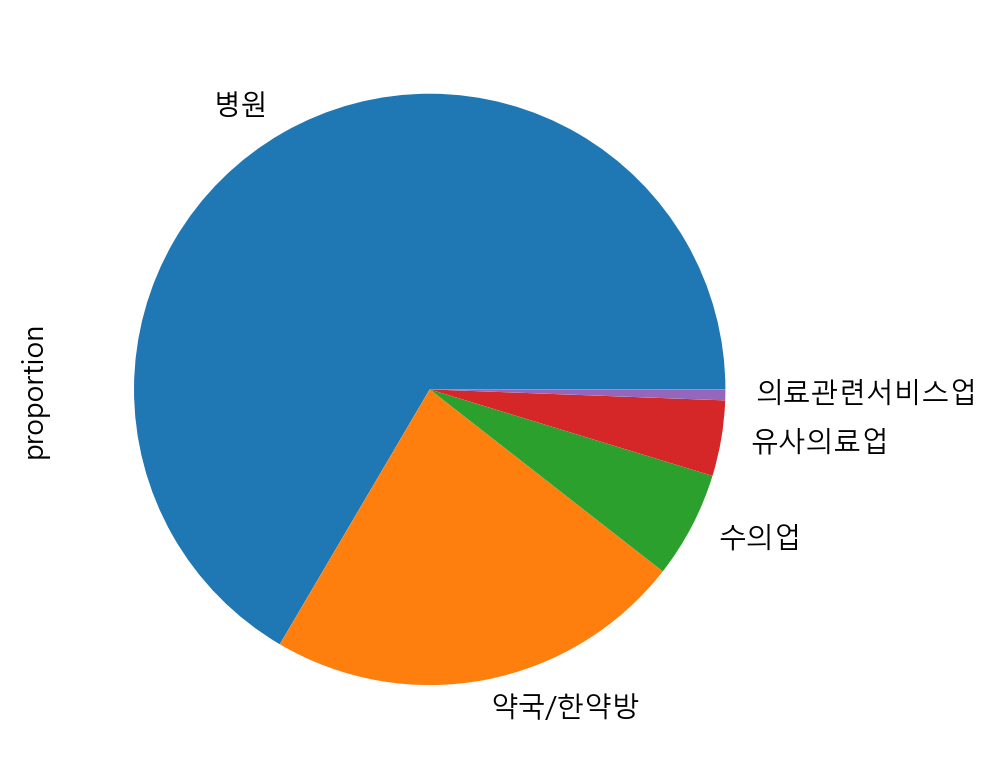

In [24]:
n.plot.pie()

#### pie 차트 작성